In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# specify the file path
file_path = './concap.csv'
# read the dataset
df = pd.read_csv(file_path)

In [3]:
df.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [4]:
df.dropna(subset=['CapitalLatitude', 'CapitalLongitude'], inplace=True)

In [5]:
df.isnull().sum()

CountryName         0
CapitalName         4
CapitalLatitude     0
CapitalLongitude    0
CountryCode         3
ContinentName       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountryName       245 non-null    object 
 1   CapitalName       241 non-null    object 
 2   CapitalLatitude   245 non-null    float64
 3   CapitalLongitude  245 non-null    float64
 4   CountryCode       242 non-null    object 
 5   ContinentName     245 non-null    object 
dtypes: float64(2), object(4)
memory usage: 11.6+ KB


In [7]:
# Standardize features
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(df[['CapitalLatitude','CapitalLongitude']])

# Applying the DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(scaled_coordinates)

DBSCAN(eps=0.3, min_samples=10)

In [8]:
# Assign cluster labels
df['Cluster'] = dbscan.labels_

C:\Users\ISAIAH\AppData\Local\Temp\ipykernel_11128\581861880.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(cluster_labels))


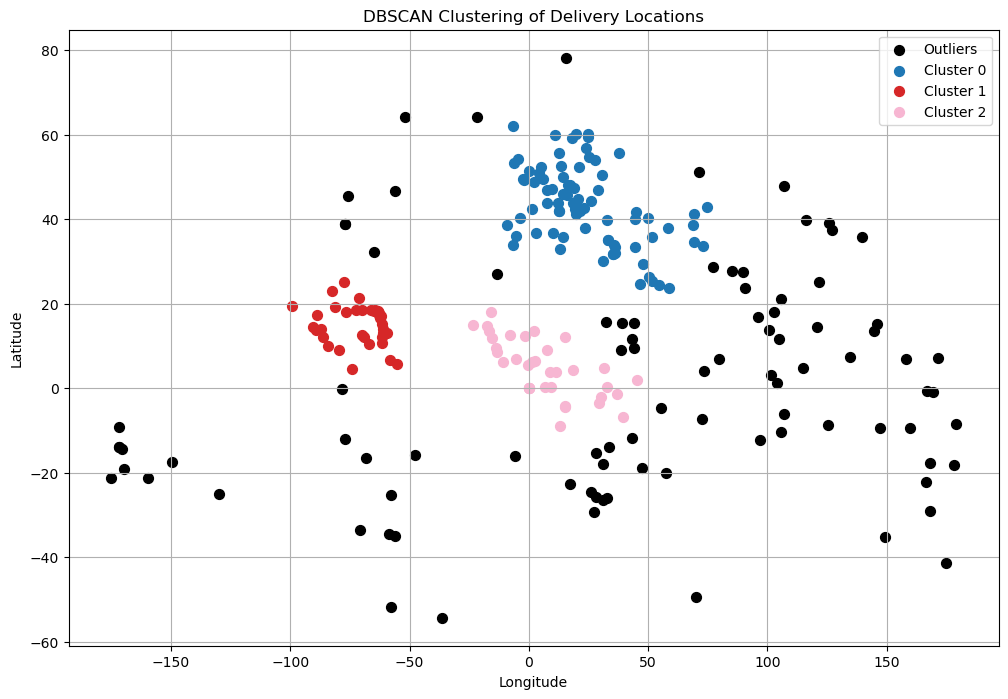

In [9]:
# Mapping the cluster labels to color
plt.figure(figsize =(12,8))
# Create a color map for clusters
cluster_labels = df['Cluster'].unique()
colors = plt.cm.get_cmap('tab20', len(cluster_labels))

# Plot each cluster
for cluster in cluster_labels:
    # Select points for the current cluster
    subset = df[df['Cluster'] == cluster]
    color = colors(cluster) if cluster != -1 else 'black'  # Use black for outliers
    plt.scatter(subset['CapitalLongitude'], subset['CapitalLatitude'], 
                color=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers', s=50)

# Finalize the plot
plt.title('DBSCAN Clustering of Delivery Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
# grid layout 
plt.grid(True)
plt.show()